In [8]:
import numpy as np 
import matplotlib.pyplot as plt
import ipdb 

In [ ]:
# noise level 

noise = 0.7

In [9]:
# make expert's policy distribution

# number of states
num_states = 10
# number of actions
num_actions = 3 # 1 for left, 2 for stay, 3 for right

# expert's policy
def expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3):
    if s_t == 1:
        return 3
    if s_t == 2:
        return 3 
    if s_t == 3:
        return 3
    if s_t == 4:
        return 3    
    
    if s_t == 5:
        # if s_tminus1 == 5, s_tminus2 == 4, s_tminus3 == 3, then with probability 1 stay 
        if s_tminus1 == 4 and s_tminus2 == 3 and s_tminus3 == 2:
            return 2
        if s_tminus1 == 5 and s_tminus2 == 4 and s_tminus3 == 3:
            return 2 
        if s_tminus1 == 5 and s_tminus2 == 5 and s_tminus3 == 4:
            return 2    
        if s_tminus1 == 5 and s_tminus2 == 5 and s_tminus3 == 5:
            return 3
        else:
            return 2
    
    if s_t == 6:
        return 3
    if s_t == 7:
        return 3
    if s_t == 8:
        return 3
    if s_t == 9:
        return 3    

In [10]:
def collect_data():
    trajectories = []

    for i in range(500):
        start = 1
        s_t = start
        s_tminus1 = start
        s_tminus2 = start
        s_tminus3 = start
        trajectory = []
        current_state = start
    
        while current_state < 10:
            a_t = expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3)
            trajectory.append((current_state, a_t))
            
            if a_t == 1:
                # with probability 0.7 go left, with probability 0.2 stay and with probability 0.1 go right
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            
            if a_t == 3:
                # with probability 0.7 go right, with probability 0.2 stay and with probability 0.1 go left
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state
        
        trajectories.append(trajectory)
    
    return trajectories

trajectories = collect_data()
print(trajectories)
print(len(trajectories))

[[(1, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 3), (1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (1, 3), (2, 3), (3, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 3), (1, 3), (2, 3), (3, 3), (3, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3)

In [11]:
# for each trajecotry in trajectories, add three 1s at the beginning
for i in range(len(trajectories)):
    trajectories[i] = [(1, 2), (1, 2), (1, 2)] + trajectories[i]
    

In [12]:
print(trajectories)

[[(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (1, 3), (2, 3), (2, 3), (3, 3), (4, 3), (5, 2), (5, 2), (5, 2), (5, 3), (6, 3), (7, 3), (8, 3), (9, 3)], [(1, 2), (1, 2), (1, 2), (1, 3), (1, 3), (2, 3), (3, 3), 

**Context Length = 4**

In [13]:
def generate_policy3(trajectories, s_t, s_tminus1, s_tminus2, s_tminus3):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(3, len(trajectory)):
            if trajectory[i][0] == s_t and trajectory[i-1][0] == s_tminus1 and trajectory[i-2][0] == s_tminus2 and trajectory[i-3][0] == s_tminus3:
                    # ipdb.set_trace()
                    actions.append(trajectory[i][1])

    # find distribution of actions        
    if len(actions) == 0:
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions)
        action_distribution = action_distribution / np.sum(action_distribution)

    else:
        try: 
            action_distribution = np.zeros(num_actions)
            for action in actions:
                action_distribution[action-1] += 1
            action_distribution = action_distribution / len(actions)
        except:
            ipdb.set_trace()
    return action_distribution

policy_cache = {}
def get_policy3(s_t, s_tminus1, s_tminus2, s_tminus3):
    if (s_t, s_tminus1, s_tminus2, s_tminus3) in policy_cache:
        return policy_cache[(s_t, s_tminus1, s_tminus2, s_tminus3)]
    policy = generate_policy3(trajectories, s_t, s_tminus1, s_tminus2, s_tminus3)
    policy_cache[(s_t, s_tminus1, s_tminus2, s_tminus3)] = policy
    return policy

In [14]:
def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(500):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1
        idle_count = 0
        while current_state < 10:
            policy = get_policy3(s_t, s_tminus1, s_tminus2, s_tminus3)
            
            # sample (a_t, a_t+1, a_t+2) from the joint distribution
            a_t = np.random.choice([1, 2, 3], p=policy)

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
            if a_t == 1:
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            if a_t == 3:
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/500, idle_counts_nums

idle_counts_4, idle_counts_nums_4 = game()
print(idle_counts_4)
print(idle_counts_nums_4)

[0. 0. 0. 0. 3. 0. 0. 0. 0. 0.]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

**Context Length = 3**

In [15]:
def generate_policy3(trajectories, s_t, s_tminus1, s_tminus2):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(3, len(trajectory)):
            if trajectory[i][0] == s_t and trajectory[i-1][0] == s_tminus1 and trajectory[i-2][0] == s_tminus2:
                    # ipdb.set_trace()
                    actions.append(trajectory[i][1])

    # find distribution of actions        
    if len(actions) == 0:
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions)
        action_distribution = action_distribution / np.sum(action_distribution)

    else:
        try: 
            action_distribution = np.zeros(num_actions)
            for action in actions:
                action_distribution[action-1] += 1
            action_distribution = action_distribution / len(actions)
        except:
            ipdb.set_trace()
    return action_distribution

policy_cache = {}
def get_policy3(s_t, s_tminus1, s_tminus2):
    if (s_t, s_tminus1, s_tminus2) in policy_cache:
        return policy_cache[(s_t, s_tminus1, s_tminus2)]
    policy = generate_policy3(trajectories, s_t, s_tminus1, s_tminus2)
    policy_cache[(s_t, s_tminus1, s_tminus2)] = policy
    return policy


def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(500):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        # s_tminus3 = 1
        idle_count = 0
        while current_state < 10:
            policy = get_policy3(s_t, s_tminus1, s_tminus2)
            
            a_t = np.random.choice([1, 2, 3], p=policy)

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
            if a_t == 1:
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            if a_t == 3:
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            # s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/500, idle_counts_nums

idle_counts_3, idle_counts_nums_3 = game()
print(idle_counts_3)
print(idle_counts_nums_3)

[0.    0.    0.    0.    3.012 0.    0.    0.    0.    0.   ]
[3, 5, 4, 2, 3, 3, 2, 2, 2, 4, 3, 4, 5, 4, 2, 3, 2, 2, 3, 2, 2, 4, 2, 2, 3, 3, 4, 2, 3, 2, 3, 2, 4, 3, 4, 2, 2, 4, 5, 3, 2, 3, 3, 3, 2, 4, 2, 2, 2, 3, 3, 3, 2, 2, 2, 4, 2, 3, 2, 2, 4, 2, 2, 4, 4, 5, 4, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 14, 2, 2, 2, 6, 3, 3, 3, 3, 3, 2, 2, 4, 2, 4, 2, 2, 2, 2, 3, 3, 2, 4, 2, 2, 5, 3, 2, 2, 4, 4, 6, 3, 3, 3, 2, 2, 2, 2, 2, 5, 4, 2, 2, 2, 3, 2, 3, 4, 2, 5, 3, 3, 2, 14, 5, 3, 2, 2, 9, 2, 3, 2, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 4, 2, 2, 2, 2, 7, 4, 2, 4, 2, 4, 2, 2, 2, 2, 2, 2, 5, 3, 4, 3, 2, 4, 2, 2, 6, 3, 3, 3, 2, 3, 2, 3, 3, 2, 4, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 4, 2, 3, 2, 3, 3, 2, 2, 5, 2, 2, 2, 2, 2, 9, 2, 2, 2, 2, 3, 2, 3, 4, 3, 4, 3, 2, 2, 5, 2, 2, 2, 3, 3, 2, 5, 4, 2, 3, 3, 2, 3, 3, 3, 4, 3, 2, 7, 2, 4, 2, 3, 3, 2, 3, 2, 2, 5, 2, 3, 4, 3, 5, 2, 2, 2, 4, 3, 3, 2, 3, 2, 2, 4, 5, 5, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 5, 3, 2, 6, 2, 3, 2, 2, 5, 2, 2, 2, 2, 2, 5, 2, 2, 2, 3, 3, 3,

**Context Length = 2**

In [16]:
def generate_policy3(trajectories, s_t, s_tminus1):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(3, len(trajectory)):
            if trajectory[i][0] == s_t and trajectory[i-1][0] == s_tminus1:
                    # ipdb.set_trace()
                    actions.append(trajectory[i][1])

    # find distribution of actions        
    if len(actions) == 0:
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions)
        action_distribution = action_distribution / np.sum(action_distribution)

    else:
        try: 
            action_distribution = np.zeros(num_actions)
            for action in actions:
                action_distribution[action-1] += 1
            action_distribution = action_distribution / len(actions)
        except:
            ipdb.set_trace()
    return action_distribution

policy_cache = {}
def get_policy3(s_t, s_tminus1):
    if (s_t, s_tminus1) in policy_cache:
        return policy_cache[(s_t, s_tminus1)]
    policy = generate_policy3(trajectories, s_t, s_tminus1)
    policy_cache[(s_t, s_tminus1)] = policy
    return policy


def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(500):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1

        idle_count = 0
        while current_state < 10:
            policy = get_policy3(s_t, s_tminus1)
            
            a_t = np.random.choice([1, 2, 3], p=policy)

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
            if a_t == 1:
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            if a_t == 3:
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/500, idle_counts_nums

idle_counts_2, idle_counts_nums_2 = game()
print(idle_counts_2)
print(idle_counts_nums_2)

[0.    0.    0.    0.    2.816 0.    0.    0.    0.    0.   ]
[1, 5, 3, 3, 2, 2, 1, 3, 1, 1, 1, 4, 2, 3, 2, 3, 1, 1, 4, 1, 3, 1, 7, 3, 2, 4, 3, 2, 2, 3, 3, 2, 3, 3, 2, 1, 1, 1, 3, 2, 1, 2, 3, 3, 1, 2, 1, 2, 2, 3, 3, 1, 2, 6, 6, 5, 1, 6, 1, 2, 4, 1, 3, 2, 1, 4, 3, 7, 2, 4, 1, 2, 6, 3, 2, 3, 1, 3, 3, 4, 1, 1, 1, 7, 3, 1, 3, 3, 3, 2, 2, 7, 1, 2, 4, 1, 3, 4, 2, 2, 6, 4, 6, 2, 1, 1, 3, 3, 5, 2, 5, 1, 2, 1, 1, 5, 1, 6, 3, 2, 2, 6, 6, 2, 1, 2, 6, 4, 1, 3, 4, 4, 4, 1, 6, 1, 3, 1, 5, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 3, 2, 4, 3, 1, 2, 1, 1, 5, 2, 1, 1, 3, 4, 4, 2, 6, 3, 8, 1, 5, 2, 2, 1, 1, 2, 4, 4, 7, 2, 4, 1, 1, 2, 2, 2, 3, 1, 1, 3, 1, 8, 1, 1, 3, 1, 1, 4, 1, 7, 1, 2, 4, 1, 4, 1, 2, 2, 3, 1, 1, 14, 1, 1, 1, 3, 1, 3, 5, 2, 1, 1, 4, 4, 1, 3, 3, 4, 1, 1, 2, 1, 6, 3, 3, 1, 1, 3, 1, 9, 2, 8, 2, 2, 3, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 4, 1, 4, 5, 2, 2, 2, 2, 2, 5, 4, 1, 6, 5, 4, 3, 7, 4, 2, 6, 3, 2, 6, 1, 1, 4, 1, 5, 7, 1, 1, 3, 2, 3, 1, 7, 1, 1, 1, 2, 2, 4, 1, 3, 3, 14, 1, 2, 1, 1, 3, 2, 8, 4, 3, 2, 1,

**Context Length = 1**

In [17]:
def generate_policy3(trajectories, s_t):
    # find distribution of actions given state s_t and previous states
    actions = []

    for trajectory in trajectories:
        for i in range(3, len(trajectory)):
            if trajectory[i][0] == s_t:
                    # ipdb.set_trace()
                    actions.append(trajectory[i][1])

    # find distribution of actions        
    if len(actions) == 0:
        # make a random distribution that sums to 1
        action_distribution = np.random.rand(num_actions)
        action_distribution = action_distribution / np.sum(action_distribution)

    else:
        try: 
            action_distribution = np.zeros(num_actions)
            for action in actions:
                action_distribution[action-1] += 1
            action_distribution = action_distribution / len(actions)
        except:
            ipdb.set_trace()
    return action_distribution

policy_cache = {}
def get_policy3(s_t):
    if (s_t) in policy_cache:
        return policy_cache[(s_t)]
    policy = generate_policy3(trajectories, s_t)
    policy_cache[(s_t)] = policy
    return policy


def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(500):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        
        idle_count = 0
        while current_state < 10:
            policy = get_policy3(s_t)
            a_t = np.random.choice([1, 2, 3], p=policy)

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
            if a_t == 1:
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            if a_t == 3:
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/500, idle_counts_nums

idle_counts_1, idle_counts_nums_1 = game()
print(idle_counts_1)
print(idle_counts_nums_1)

[0.    0.    0.    0.    3.062 0.    0.    0.    0.    0.   ]
[0, 11, 0, 1, 5, 4, 0, 0, 1, 1, 1, 1, 6, 5, 0, 0, 3, 14, 8, 4, 3, 0, 1, 1, 4, 2, 0, 6, 5, 1, 0, 6, 4, 4, 1, 0, 1, 4, 3, 1, 0, 10, 1, 2, 0, 4, 1, 7, 2, 2, 5, 5, 3, 8, 6, 2, 1, 4, 0, 16, 1, 1, 1, 3, 0, 0, 0, 0, 5, 4, 0, 0, 0, 2, 9, 0, 0, 0, 2, 5, 2, 3, 5, 3, 0, 1, 2, 3, 1, 2, 5, 12, 7, 2, 2, 3, 2, 1, 0, 7, 1, 1, 1, 1, 6, 4, 4, 3, 2, 3, 3, 1, 0, 0, 0, 1, 10, 3, 0, 0, 2, 6, 2, 1, 0, 3, 0, 0, 0, 2, 5, 0, 0, 2, 3, 3, 1, 0, 12, 6, 0, 0, 5, 0, 2, 4, 3, 4, 1, 4, 0, 15, 4, 10, 7, 2, 10, 0, 0, 4, 3, 0, 3, 4, 2, 13, 0, 0, 3, 9, 2, 0, 0, 0, 3, 2, 1, 3, 10, 6, 0, 3, 6, 2, 0, 5, 4, 2, 13, 3, 8, 0, 5, 0, 0, 2, 1, 6, 5, 1, 0, 6, 6, 1, 2, 13, 4, 6, 4, 7, 4, 6, 2, 3, 0, 0, 1, 3, 2, 2, 2, 3, 1, 1, 6, 11, 0, 1, 4, 10, 0, 0, 1, 3, 5, 1, 4, 4, 14, 4, 1, 2, 0, 1, 3, 9, 3, 1, 1, 4, 0, 5, 0, 3, 9, 0, 1, 0, 1, 0, 5, 5, 0, 4, 0, 1, 1, 1, 11, 0, 1, 1, 0, 2, 4, 3, 1, 0, 8, 7, 0, 2, 2, 2, 2, 1, 6, 25, 6, 3, 10, 3, 4, 9, 4, 10, 0, 4, 1, 1, 2, 3, 3, 3, 7, 0

**Expert**

In [18]:
def game():

    # iterate over 100 episodes. 
    # For each episode, start at state 1 and follow the policy generated by the expert until the end of the game at state 10
    # For each episode, keep a record of the states at which the agent took action 2 (stay) and the number of times it took action 2 at each state 

    idle_counts = np.zeros(num_states)
    idle_counts_nums = []

    for i in range(100):
        # print(f'Episode {i}')
        current_state = 1
        s_t = 1
        s_tminus1 = 1
        s_tminus2 = 1
        s_tminus3 = 1
        idle_count = 0
        while current_state < 10:
            policy = expert_policy(s_t, s_tminus1, s_tminus2, s_tminus3)
            a_t = policy

            if a_t == 2:
                try:
                    idle_counts[current_state - 1] += 1 
                    idle_count += 1
                except:
                    ipdb.set_trace()
            if a_t == 1:
                if np.random.rand() < 0.7:
                    current_state -= 1
                elif np.random.rand() < 0.2:
                    current_state = current_state
                else:
                    current_state += 1
            if a_t == 3:
                if np.random.rand() < 0.8:
                    current_state += 1
                else:
                    current_state = current_state
            
            s_tminus3 = s_tminus2
            s_tminus2 = s_tminus1
            s_tminus1 = s_t
            s_t = current_state

            if current_state >= 10 or current_state <= 0:
                break
        
        idle_counts_nums.append(idle_count)

    return idle_counts/100, idle_counts_nums

idle_counts_expert, idle_counts_nums_expert = game()
print(idle_counts_expert)
print(idle_counts_nums_expert)


Episode 0
Episode 1
Episode 2
Episode 3
Episode 4
Episode 5
Episode 6
Episode 7
Episode 8
Episode 9
Episode 10
Episode 11
Episode 12
Episode 13
Episode 14
Episode 15
Episode 16
Episode 17
Episode 18
Episode 19
Episode 20
Episode 21
Episode 22
Episode 23
Episode 24
Episode 25
Episode 26
Episode 27
Episode 28
Episode 29
Episode 30
Episode 31
Episode 32
Episode 33
Episode 34
Episode 35
Episode 36
Episode 37
Episode 38
Episode 39
Episode 40
Episode 41
Episode 42
Episode 43
Episode 44
Episode 45
Episode 46
Episode 47
Episode 48
Episode 49
Episode 50
Episode 51
Episode 52
Episode 53
Episode 54
Episode 55
Episode 56
Episode 57
Episode 58
Episode 59
Episode 60
Episode 61
Episode 62
Episode 63
Episode 64
Episode 65
Episode 66
Episode 67
Episode 68
Episode 69
Episode 70
Episode 71
Episode 72
Episode 73
Episode 74
Episode 75
Episode 76
Episode 77
Episode 78
Episode 79
Episode 80
Episode 81
Episode 82
Episode 83
Episode 84
Episode 85
Episode 86
Episode 87
Episode 88
Episode 89
Episode 90
Episode 9

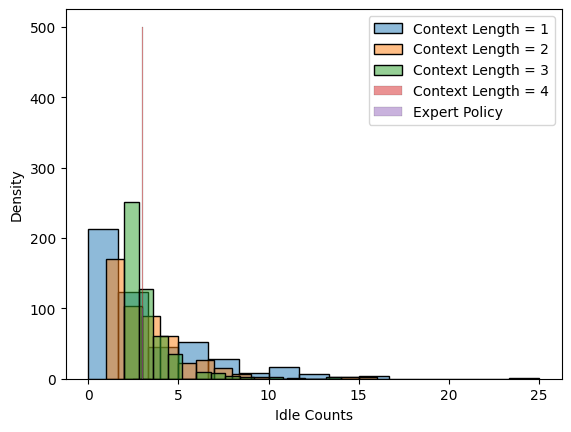

In [19]:
# use seaborn to make histogram of idle_counts_nums_1, idle_counts_nums_2, idle_counts_nums_3, idle_counts_nums_4

import seaborn as sns

# use seaborn to make histogram of idle_counts_nums_1, idle_counts_nums_2, idle_counts_nums_3, idle_counts_nums_4

sns.histplot(idle_counts_nums_1, bins=15, alpha=0.5, label='Context Length = 1')
sns.histplot(idle_counts_nums_2, bins=15, alpha=0.5, label='Context Length = 2') # , kde=True
sns.histplot(idle_counts_nums_3, bins=15, alpha=0.5, label='Context Length = 3')
sns.histplot(idle_counts_nums_4, bins=15, alpha=0.5, label='Context Length = 4')
sns.histplot(idle_counts_nums_expert, bins=15, alpha=0.5, label='Expert Policy')
# sns.histplot(idle_counts_nums_5, bins=15, alpha=0.5, label='Action Horizon = 5', kde=True)
# sns.histplot(idle_counts_nums_expert, bins=15, alpha=0.5, label='Expert Policy', kde=True)

# Adding labels and legend
plt.legend()
plt.xlabel('Idle Counts')
plt.ylabel('Density')
# plt.title('Histogram of Idle Counts for Different Action Horizons')
plt.show()



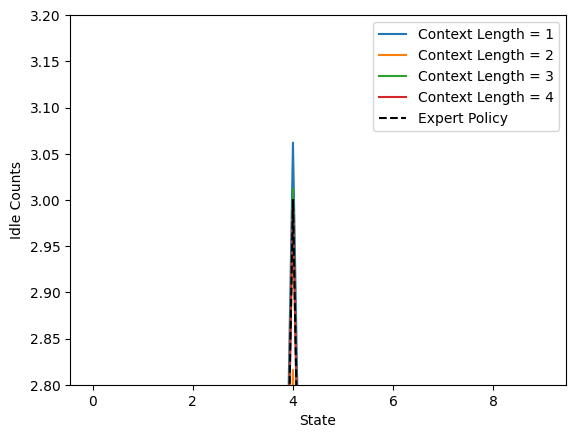

In [20]:
plt.plot(idle_counts_1, label='Context Length = 1')
plt.plot(idle_counts_2, label='Context Length = 2')
plt.plot(idle_counts_3, label='Context Length = 3')
plt.plot(idle_counts_4, label='Context Length = 4')
plt.plot(idle_counts_expert, label='Expert Policy', linestyle='dashed', color='black')
# plt.plot(idle_counts_5, label='Action Horizon = 5')
# make the expert policy line dotted
# plt.plot(idle_counts_expert, label='Expert Policy', linestyle='dashed', color='black')
plt.legend()
plt.xlabel('State')
plt.ylabel('Idle Counts')
# y axis range from 2 to 4
plt.ylim(2.8, 3.2)
plt.show()

Action horizon = 1: [0, 11, 0, 1, 5, 4, 0, 0, 1, 1, 1, 1, 6, 5, 0, 0, 3, 14, 8, 4, 3, 0, 1, 1, 4, 2, 0, 6, 5, 1, 0, 6, 4, 4, 1, 0, 1, 4, 3, 1, 0, 10, 1, 2, 0, 4, 1, 7, 2, 2, 5, 5, 3, 8, 6, 2, 1, 4, 0, 16, 1, 1, 1, 3, 0, 0, 0, 0, 5, 4, 0, 0, 0, 2, 9, 0, 0, 0, 2, 5, 2, 3, 5, 3, 0, 1, 2, 3, 1, 2, 5, 12, 7, 2, 2, 3, 2, 1, 0, 7, 1, 1, 1, 1, 6, 4, 4, 3, 2, 3, 3, 1, 0, 0, 0, 1, 10, 3, 0, 0, 2, 6, 2, 1, 0, 3, 0, 0, 0, 2, 5, 0, 0, 2, 3, 3, 1, 0, 12, 6, 0, 0, 5, 0, 2, 4, 3, 4, 1, 4, 0, 15, 4, 10, 7, 2, 10, 0, 0, 4, 3, 0, 3, 4, 2, 13, 0, 0, 3, 9, 2, 0, 0, 0, 3, 2, 1, 3, 10, 6, 0, 3, 6, 2, 0, 5, 4, 2, 13, 3, 8, 0, 5, 0, 0, 2, 1, 6, 5, 1, 0, 6, 6, 1, 2, 13, 4, 6, 4, 7, 4, 6, 2, 3, 0, 0, 1, 3, 2, 2, 2, 3, 1, 1, 6, 11, 0, 1, 4, 10, 0, 0, 1, 3, 5, 1, 4, 4, 14, 4, 1, 2, 0, 1, 3, 9, 3, 1, 1, 4, 0, 5, 0, 3, 9, 0, 1, 0, 1, 0, 5, 5, 0, 4, 0, 1, 1, 1, 11, 0, 1, 1, 0, 2, 4, 3, 1, 0, 8, 7, 0, 2, 2, 2, 2, 1, 6, 25, 6, 3, 10, 3, 4, 9, 4, 10, 0, 4, 1, 1, 2, 3, 3, 3, 7, 0, 0, 9, 8, 4, 0, 1, 10, 11, 0, 1, 2, 1, 3,

/var/folders/vy/t04thm216njgtmzgzykpgzr80000gn/T/ipykernel_37967/2042866289.py:24: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(idle_counts_nums_expert, label='Expert Policy', color = 'black', linestyle='--', fill=False)


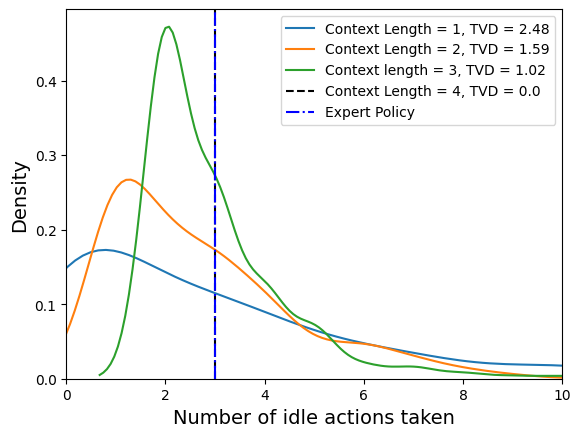

In [33]:
# calculate total variation distance between the distributions and expert policy
import seaborn as sns
import scipy.stats as stats

# print(f'Noise = {delta}')
print(f'Action horizon = 1: {idle_counts_nums_1}')
print('Total Variation Distance between Context Length = 1 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_1, idle_counts_nums_expert))
print(f'Action horizon = 2: {idle_counts_nums_2}')
print('Total Variation Distance between Context Length = 2 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_2, idle_counts_nums_expert))
print(f'Action horizon = 3: {idle_counts_nums_3}')
print('Total Variation Distance between Context Length = 3 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_3, idle_counts_nums_expert))
print(f'Action horizon = 4: {idle_counts_nums_4}')
print('Total Variation Distance between Context Length = 4 and Expert Policy:', stats.wasserstein_distance(idle_counts_nums_4, idle_counts_nums_expert))
print(f'Expert Policy: {idle_counts_nums_expert}')



# Plotting KDEs
sns.kdeplot(idle_counts_nums_1, label='Action Horizon = 1', fill=False)
sns.kdeplot(idle_counts_nums_2, label='Action Horizon = 2', fill=False)
sns.kdeplot(idle_counts_nums_3, label='Action Horizon = 3', fill=False)


sns.kdeplot(idle_counts_nums_expert, label='Expert Policy', color = 'black', linestyle='--', fill=False)



plt.axvline(np.mean(idle_counts_nums_expert), color='black', linestyle='--')
plt.axvline(np.mean(idle_counts_nums_4), color='blue', linestyle='-.')



plt.legend()
plt.legend([f'Context Length = 1, TVD = 2.48', 'Context Length = 2, TVD = 1.59', 'Context length = 3, TVD = 1.02', 'Context Length = 4, TVD = 0.0', 'Expert Policy'], fontsize=10)



plt.xlabel('Number of idle actions taken', fontsize=14)
plt.ylabel('Density', fontsize=14)

# xlim = 0 to max number of idle actions taken
plt.xlim(0, 10)

# plt.title(f"Noise in environment's transition dynamics = {1 - noise}")
plt.show()